In [52]:
! pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [53]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# 1. Cài thư viện opencv trên python và thực hiện công việc sau:

## a) Load và hiện thị ảnh màu/xám

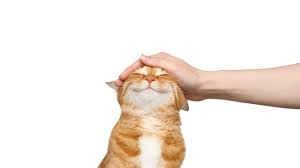

In [54]:
IMG_PATH = "/content/drive/MyDrive/Open CV course/Data/cat_image.jpg"
img = cv.imread(IMG_PATH)
cv2_imshow(img)

## b) Chuyển từ ảnh màu sang ảnh xám

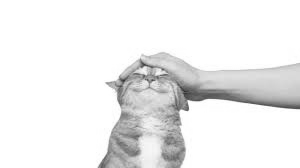

In [55]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

## c) Resize ảnh

In [56]:
half = cv.resize(img, (0, 0), fx = 0.1, fy = 0.1)
bigger = cv.resize(img, (280, 280))


In [57]:
cv2_imshow(half)

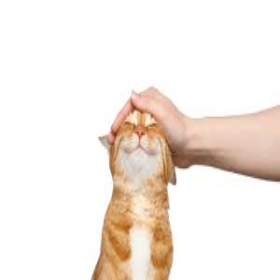

In [58]:
cv2_imshow(bigger)

## d) Rotate ảnh

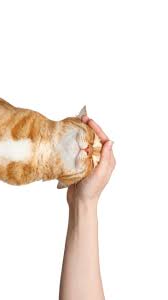

In [59]:
rotate_image = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
cv2_imshow(rotate_image)

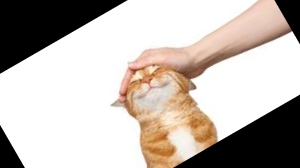

In [60]:
def rotate(image, angle, center = None, scale = 1.0):
    (h, w) = image.shape[:2]
    if center is None:
        center = (w / 2, h / 2)
    # Perform the rotation
    M = cv.getRotationMatrix2D(center, angle, scale)
    rotated = cv.warpAffine(image, M, (w, h))
    return rotated

rotated = rotate(img, 30)
cv2_imshow(rotated)

## e) Threshold trên ảnh

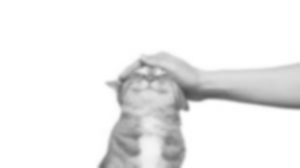

In [61]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blurred = cv.GaussianBlur(gray, (7, 7), 0)
cv2_imshow(blurred)

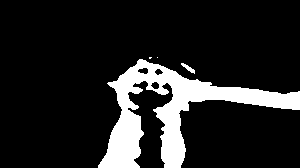

In [62]:
(T, threshInv) = cv.threshold(blurred, 200, 255,
	cv.THRESH_BINARY_INV)
cv2_imshow(threshInv)

## f) Tìm các đường thẳng, đường tròn trên ảnh

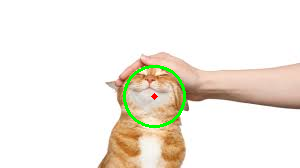

In [63]:
detected_circles = cv.HoughCircles(blurred,
                   cv.HOUGH_GRADIENT, 1, 20, param1 = 50,
               param2 = 30, minRadius = 1, maxRadius = 40)

if detected_circles is not None:

    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))

    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]

        # Draw the circumference of the circle.
        cv.circle(img, (a, b), r, (0, 255, 0), 2)

        # Draw a small circle (of radius 1) to show the center.
        cv.circle(img, (a, b), 1, (0, 0, 255), 3)
        cv2_imshow(img)

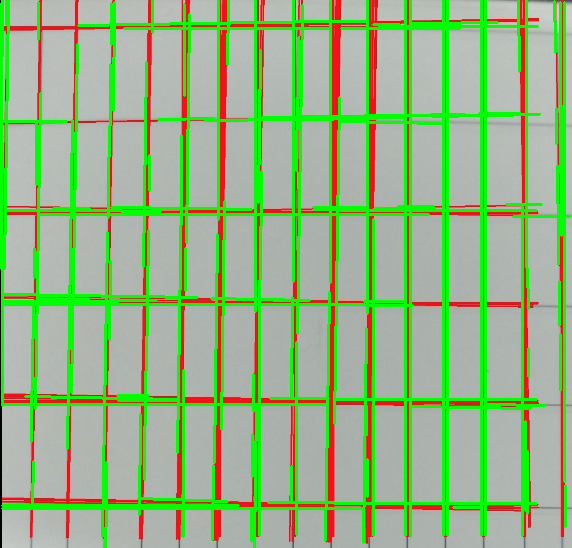

In [71]:
image_line = "/content/image_2024-06-28_141453551.png"
image_line = cv.imread(image_line)

gray = cv.cvtColor(image_line,cv.COLOR_BGR2GRAY)

# Use canny edge detection
edges = cv.Canny(gray,50,150,apertureSize=3)

# Apply HoughLinesP method to
# to directly obtain line end points
lines_list =[]
lines = cv.HoughLinesP(
            edges, # Input edge image
            1, # Distance resolution in pixels
            np.pi/180, # Angle resolution in radians
            threshold=100, # Min number of votes for valid line
            minLineLength=5, # Min allowed length of line
            maxLineGap=10 # Max allowed gap between line for joining them
            )

# Iterate over points
for points in lines:
      # Extracted points nested in the list
    x1,y1,x2,y2=points[0]
    # Draw the lines joing the points
    # On the original image_line
    cv.line(image_line,(x1,y1),(x2,y2),(0,255,0),2)
    # Maintain a simples lookup list for points
    lines_list.append([(x1,y1),(x2,y2)])
cv2_imshow(image_line)

# 2. Thử các kernel khác nhau trên ảnh (identity, edge detection, sharpen, blur)

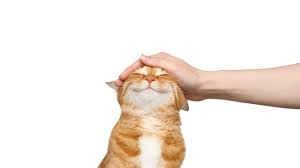

In [76]:
img = cv.imread(IMG_PATH)
identity_kernel = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]])

identity = cv.filter2D(src=img, ddepth=-1, kernel=identity_kernel)
cv2_imshow(identity)

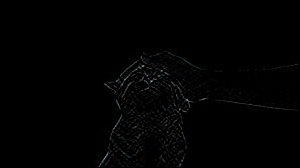

In [80]:
img = cv.imread(IMG_PATH)
edge_detection_kernel = np.array([[1, 0, -1],
                    [0, 0, 0],
                    [-1, 0, 1]])

edge_detection = cv.filter2D(src=img, ddepth=-1, kernel=edge_detection_kernel)
cv2_imshow(edge_detection)

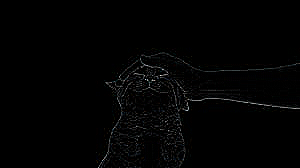

In [81]:
img = cv.imread(IMG_PATH)
edge_detection_kernel = np.array([[0, 1, 0],
                    [1, -4, 1],
                    [0, 1, 0]])

edge_detection = cv.filter2D(src=img, ddepth=-1, kernel=edge_detection_kernel)
cv2_imshow(edge_detection)

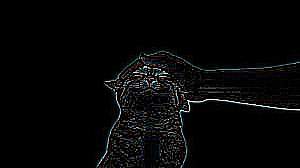

In [82]:
img = cv.imread(IMG_PATH)
edge_detection_kernel = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])

edge_detection = cv.filter2D(src=img, ddepth=-1, kernel=edge_detection_kernel)
cv2_imshow(edge_detection)

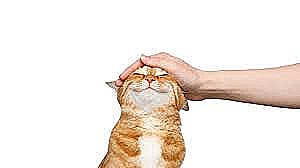

In [84]:
img = cv.imread(IMG_PATH)
sharpen_kernel = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

sharpened = cv.filter2D(src=img, ddepth=-1, kernel=sharpen_kernel)
cv2_imshow(sharpened)

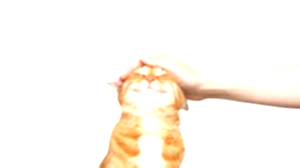

In [94]:
img = cv.imread(IMG_PATH)
blur_kernel = 0.15 * np.array([[1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1]])

blurred = cv.filter2D(src=img, ddepth=-1, kernel=blur_kernel)
cv2_imshow(blurred)

# 3. Tự implement lại phép tính convolution với input là ảnh, kernel, padding, stride

In [95]:
def pad(X, padding):
  output = np.zeros((X.shape[0] + padding[0] * 2, X.shape[1] + padding[1] * 2))
  if padding[0] + padding[1] > 0:
    output[padding[0]:-(padding[0]), padding[1]:-(padding[1])] = X
  else:
    output = X
  return output

def convolution(X, W, stride, padding):
  padded = pad(X, padding)
  output_height = int(((X.shape[0] - W.shape[0] + 2 * padding[0]) / stride[0]) + 1)
  output_width = int(((X.shape[1] - W.shape[1] + 2 * padding[1]) / stride[1]) + 1)
  out = np.zeros((output_height, output_width))
  for y in range(0, output_width):
      for x in range(0, output_height):
        out[x, y] = np.sum(padded[x * stride[0] : x * stride[0] + W.shape[0], y * stride[1]:y * stride[1] + W.shape[1]] * W)
  return out

In [116]:
im_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
W = blur_kernel
padding = (1, 1)
stride = (1, 1)

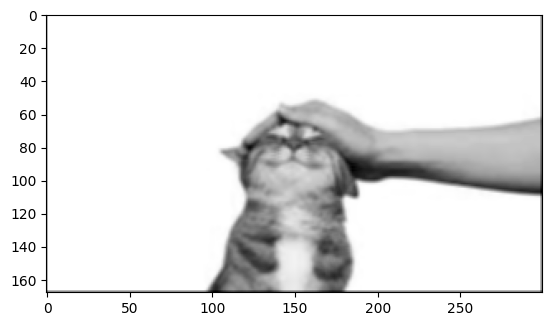

In [118]:
plt.imshow(convolution(im_gray, W, stride, padding), cmap = "gray")

# 4. Tư implement lại thuật toán sobel tìm edge của ảnh

In [119]:
def sobel_edge_detection(image, filter, verbose):
  new_image_x = convolution(image, filter, (1, 1), (1, 1))

  if verbose:
    plt.imshow(new_image_x, cmap = "gray")
    plt.title("Horizontal Edge")
    plt.show()

  new_image_y = convolution(image, np.flip(filter.T, axis=0), (1, 1), (1, 1))
  if verbose:
      plt.imshow(new_image_y, cmap='gray')
      plt.title("Vertical Edge")
      plt.show()

  gradient_magnitude = np.sqrt(np.square(new_image_x) + np.square(new_image_y))
  gradient_magnitude *= 255.0 / gradient_magnitude.max()
  if verbose:
      plt.imshow(gradient_magnitude, cmap='gray')
      plt.title("Gradient Magnitude")
      plt.show()
  return gradient_magnitude

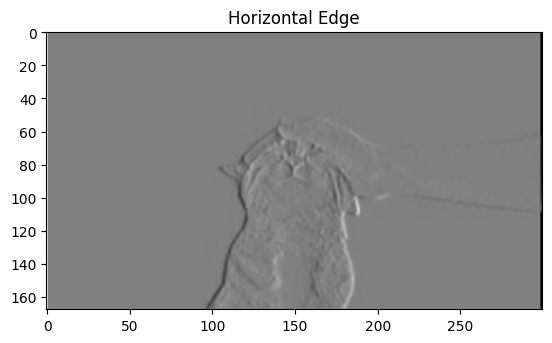

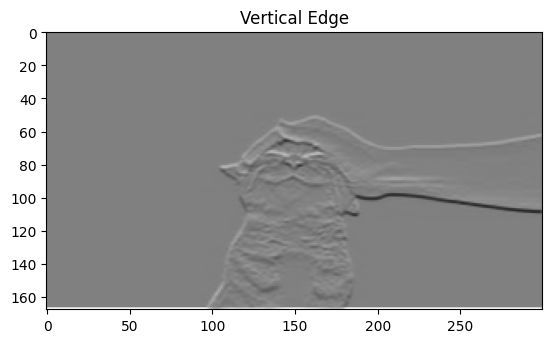

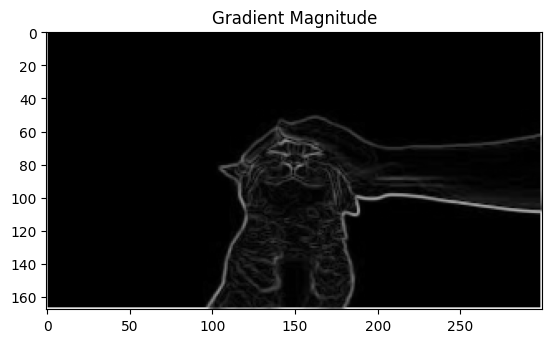

In [122]:
filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_image = sobel_edge_detection(im_gray, filter, True)